In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [43]:
df = pd.read_csv('bank-additional-full.csv', sep=";")
df.sample(4).T # the head row so wide so we need to transpose it 

,34230,7867,17798,27719
age,29,33,53,30
job,blue-collar,technician,blue-collar,management
marital,married,single,divorced,married
education,basic.9y,university.degree,basic.4y,university.degree
default,no,no,no,no
housing,no,yes,no,no
loan,no,no,no,no
contact,cellular,telephone,cellular,telephone
month,may,jun,jul,mar
day_of_week,wed,mon,tue,mon


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [45]:
bank_data = df.copy()

In [46]:
#Select the relevant numerical features 
numerical_features = [col for col in bank_data.columns if np.issubdtype(bank_data[col].dtype, np.number)]
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [47]:
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


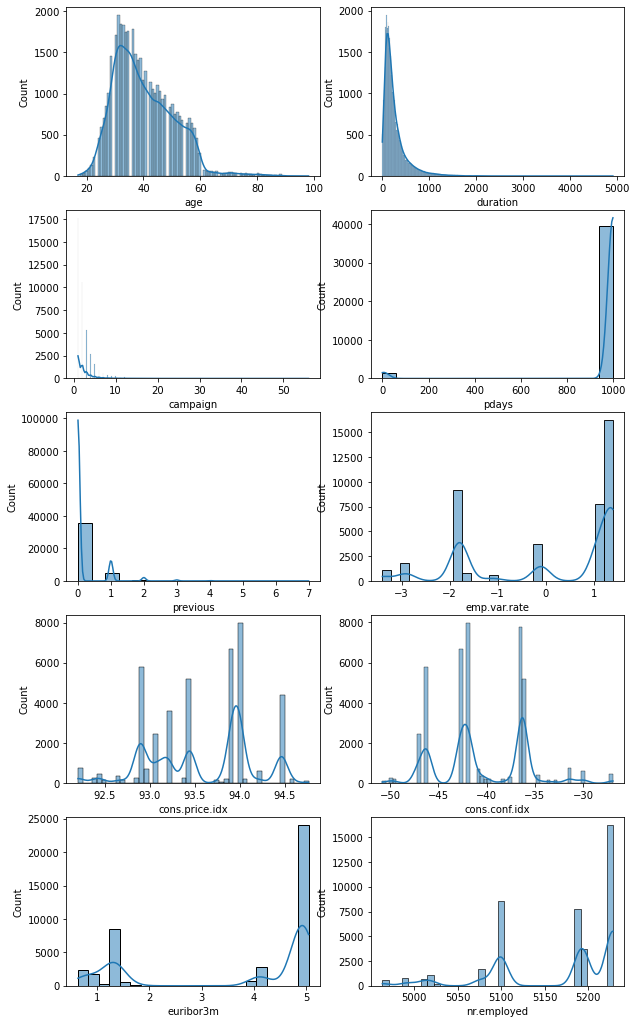

In [48]:
#plot the distributions of the single numerical columns 
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5,2, index+1)
    sns.histplot(bank_data[col], kde=True, palette='Blues')

**Observation:** <br>
- From the preceding plot, we can see that, besides the age and duration columns, the rest of the numerical features do not seem to have a normal distribution of values since their distributions seem scattered and only a few values are present
- The second thing to noticed is that **campaign**, **pdays**, **previous** might be a categorical features or should be turn to categorical features due to being scattered data

In [49]:
#Check the value of **campaign**, **pdays**, **previous**

In [50]:
bank_data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [51]:
bank_data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [52]:
bank_data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

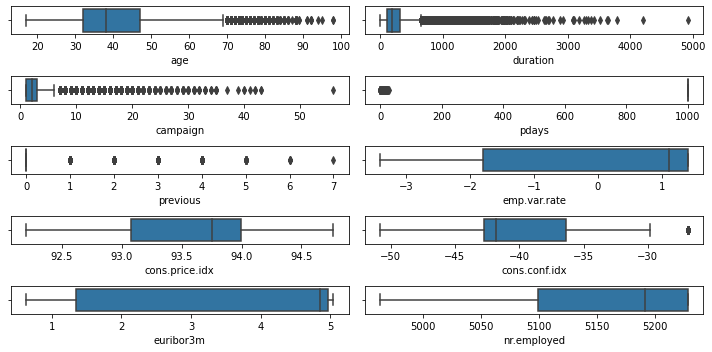

In [53]:
figure = plt.figure(figsize=(10, 5))
for index, col in enumerate(numerical_features):
    ax = figure.add_subplot(5, 2, index+1)
    sns.boxplot(x=bank_data[col], ax=ax)
    plt.tight_layout()

In [54]:
#compute the percentage of possible outlier per features
def compute_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    percentage = round(df[(df[col] < (Q1 - 1.5*IQR))|(df[col] > (Q1 + 1.5*IQR))].shape[0]/df.shape[0]*100,2)
    return percentage
for col in numerical_features:
    p = compute_outlier(bank_data, col)
    print(f'{col} : {p} %')

age : 10.27 %
duration : 15.65 %
campaign : 12.1 %
pdays : 3.68 %
previous : 13.66 %
emp.var.rate : 0.0 %
cons.price.idx : 11.43 %
cons.conf.idx : 4.89 %
euribor3m : 0.0 %
nr.employed : 0.0 %


In [57]:
#Plot kde and hisplot to analyse the distribute of variable for successfull and unsuccessfull canmpain
fig = px.histogram(bank_data, x='age', marginal='box', title="Distribution of Age", color='y')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
# Analysing distributions of categorical features in the banking dataset 
categorical_features = [col for col in bank_data.columns if pd.api.types.is_string_dtype(bank_data[col])]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

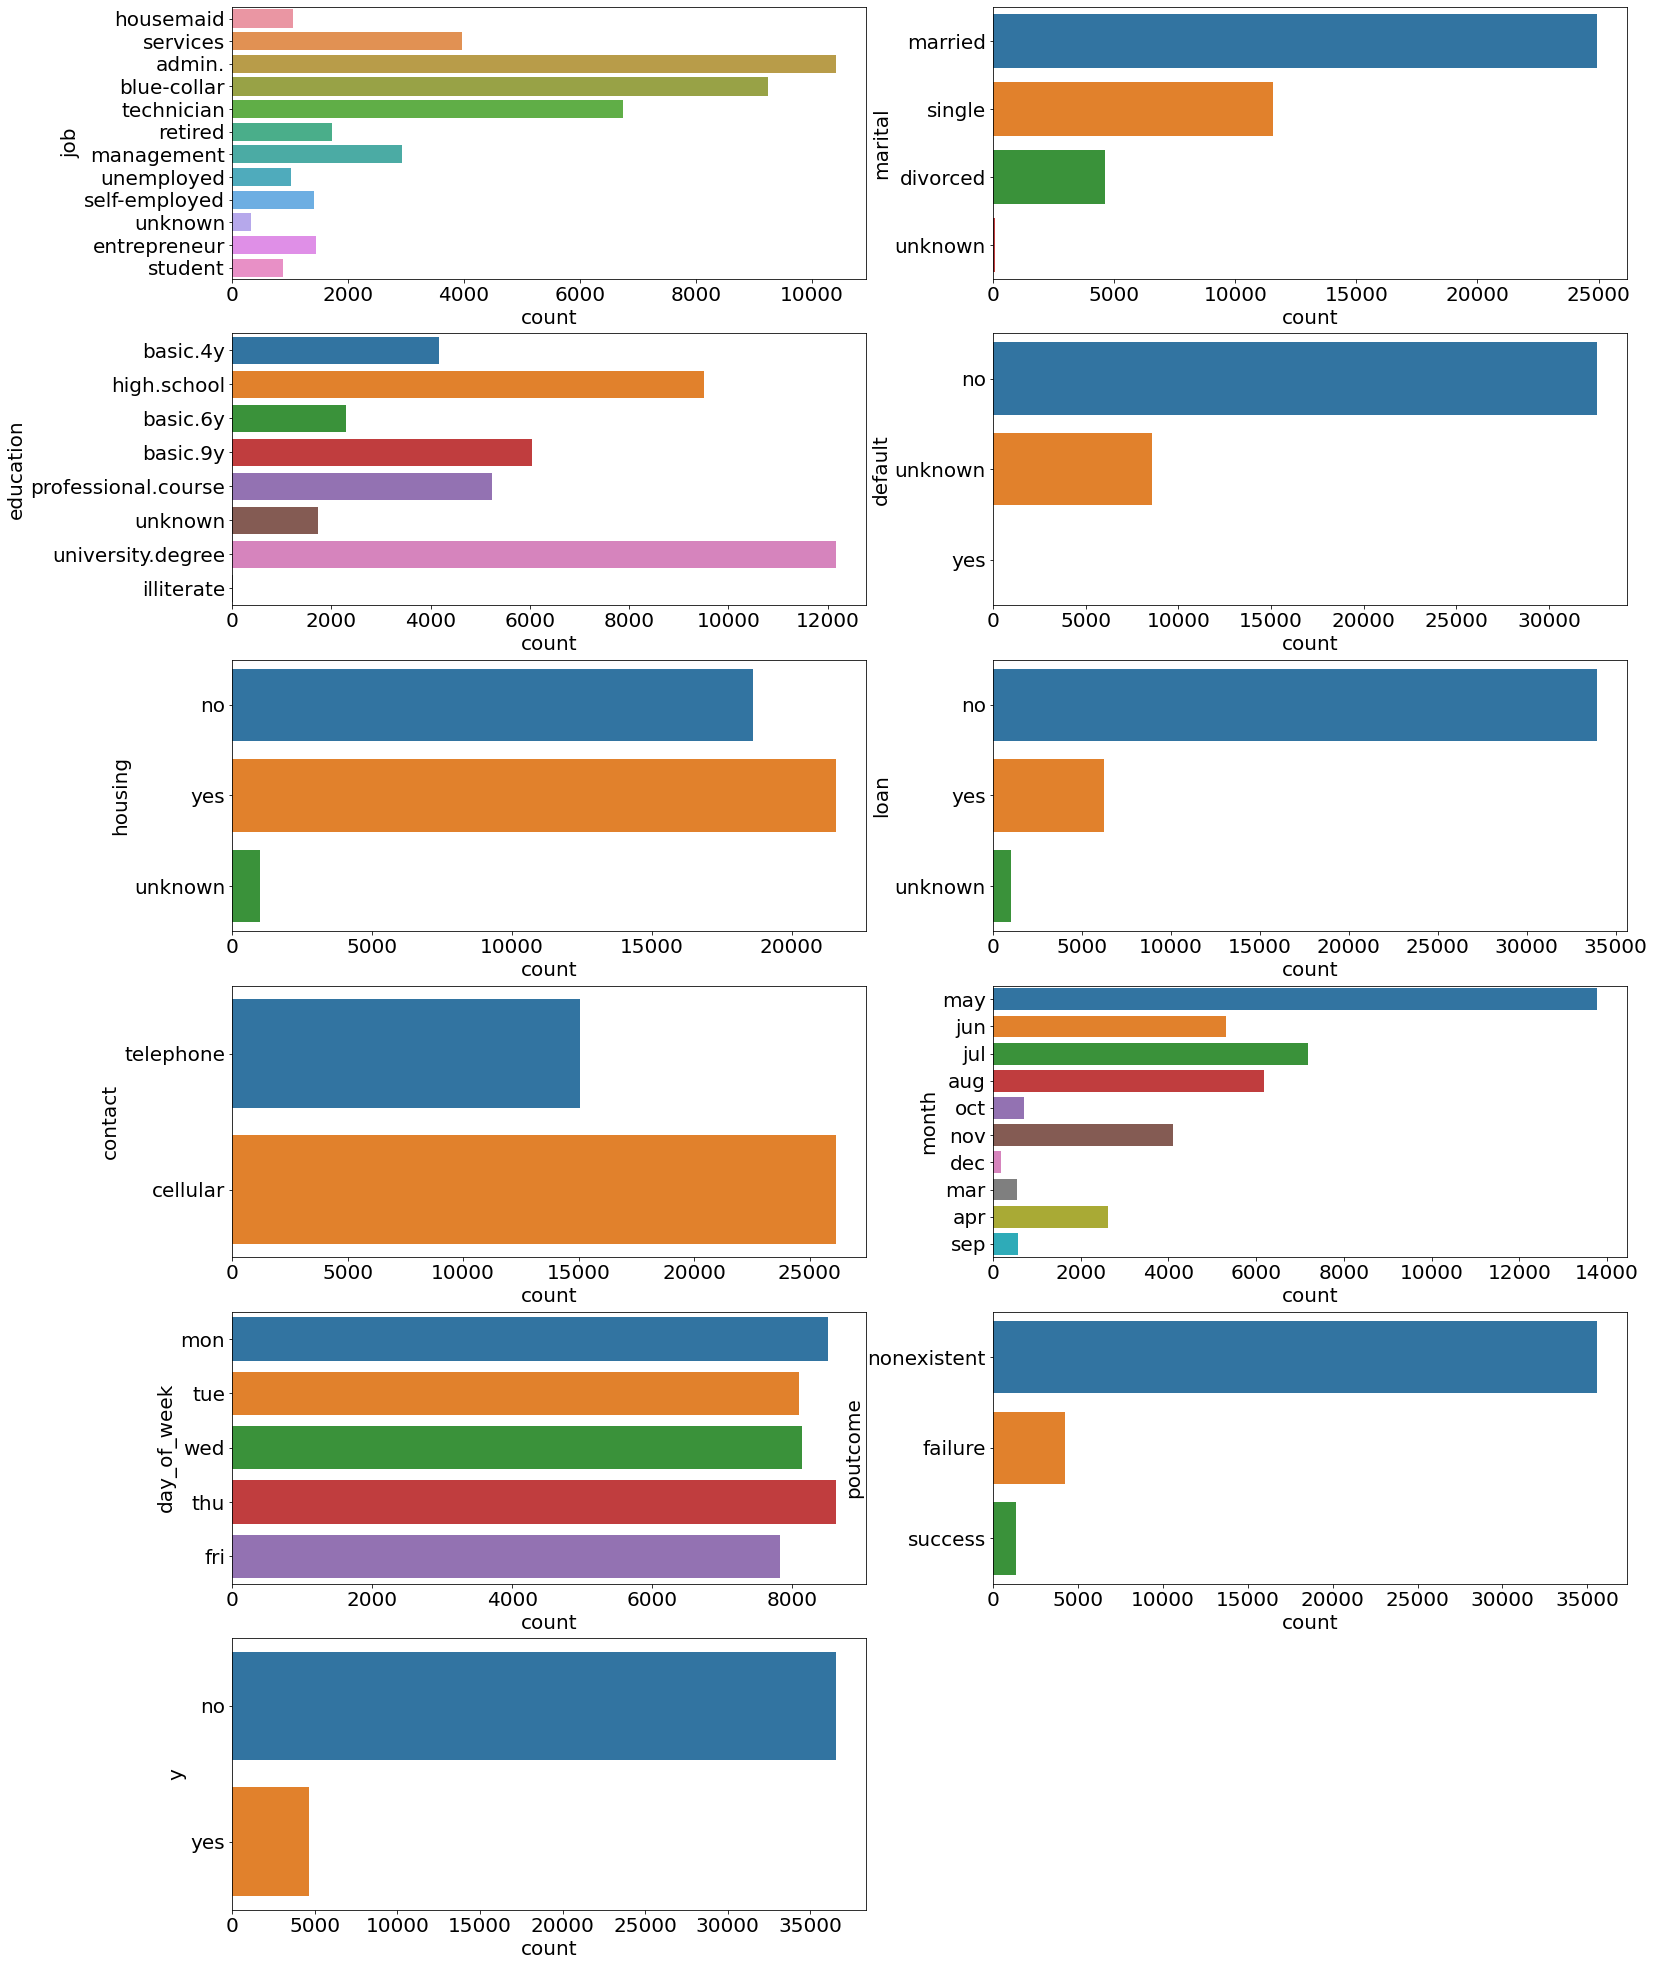

In [9]:
#plot the distribution and frequency of categorical features
plt.figure(figsize=(25,35))
for index, col in enumerate(categorical_features):
    plt.subplot(6,2, index+1)
    ax = sns.countplot(y=col, data=bank_data)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

In [10]:
bank_data['y'].value_counts()*100/bank_data.shape[0]

no     88.734583
yes    11.265417
Name: y, dtype: float64

From the preceding output, we can derive that only 11% of the contacted customers decided to accept the offer from the bank

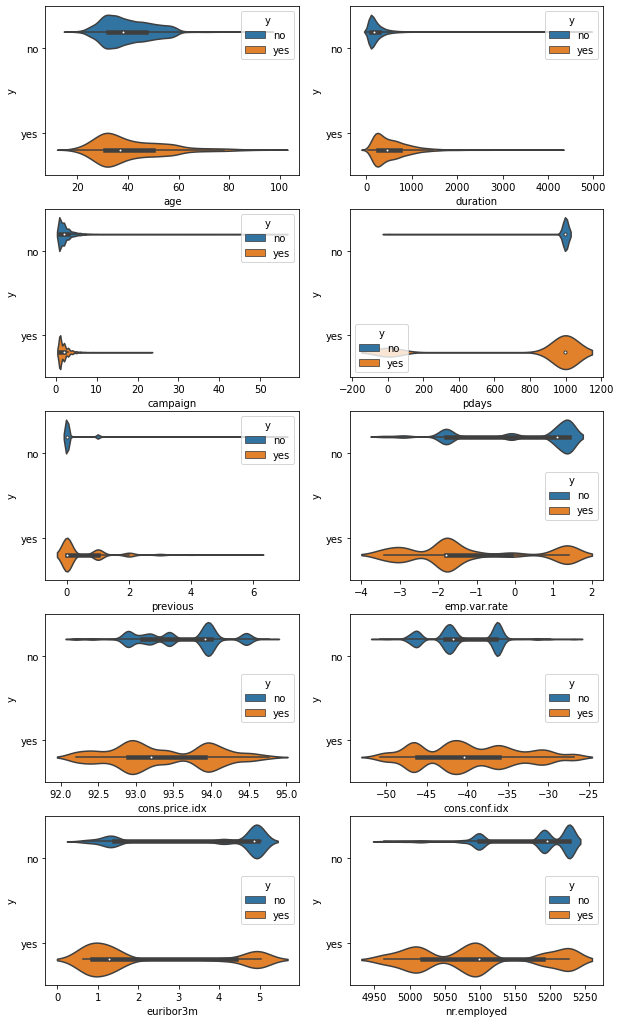

In [11]:
#Is there a statistically significant difference in numerical features for successfull and non-successful
#Create violin plots that compare the distribution of the numerical features for the wo types of outcomes 
plt.figure(figsize=(10,18))
for index,col in enumerate(numerical_features):
    plt.subplot(5,2, index+1)
    sns.violinplot(x=col, y='y', data=bank_data, hue='y')

In [12]:
#test whether the average value of the respective numerical features is different for yes entries for the y column against no entries for each numerical feature
from scipy.stats import ttest_ind
def test_means(data, col):
    ''' ttest_ind the average value of 2 independent groups '''
    yes_mask = data['y'] == 'yes'
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, round(ttest_res[0], 4), round(ttest_res[1], 4)]
test_df = pd.DataFrame(columns = ['column', 'mean yes','mean no','ttest stat','ttest pval'])
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


For each of the numerical features, the average value for successful marketing campaign is significantly different than the avarage value for unsuccessful marketing campagins

In [13]:
from scipy.stats import ks_2samp
def test_ks(data, col):
    yes_mask = data['y'] == 'yes'
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    
    kstest_res = ks_2samp(values_yes, values_no)
    return [col, round(kstest_res[0], 4), round(kstest_res[1], 4)]
test_df_2 = pd.DataFrame(columns = ['column', 'ks stat', 'ks pval'])
for index, col in enumerate(numerical_features):
    test_df_2.loc[index] = test_ks(bank_data, col)
test_df_2

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


From the preceding figure, we can also observe that the distributions of the various numerical features present a significant difference between successful and unsuccessful marketing campaigns

In [14]:
#divide the numerical features into two groups: campaign-related features and financial feature.
campain_columns = ['age', 'duration', 'campaign', 'previous']
financial_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

<Figure size 720x720 with 0 Axes>

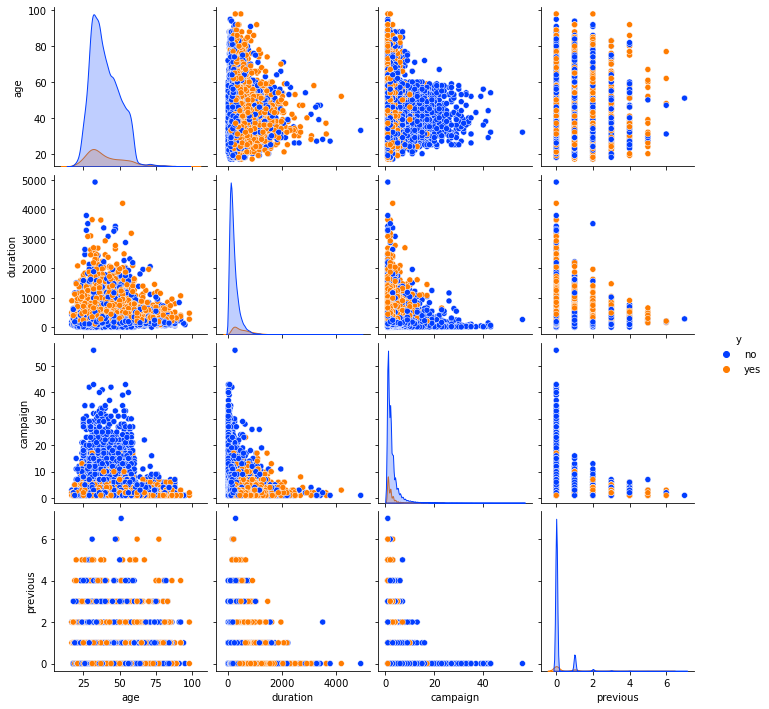

In [15]:
plot_data = bank_data[campain_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue='y', palette='bright')

In the previous column, most of the successfull marketing campaigns were newly contacted customers, while a substantial peak is present for customers who were contacted the second time, but without success

<Figure size 720x720 with 0 Axes>

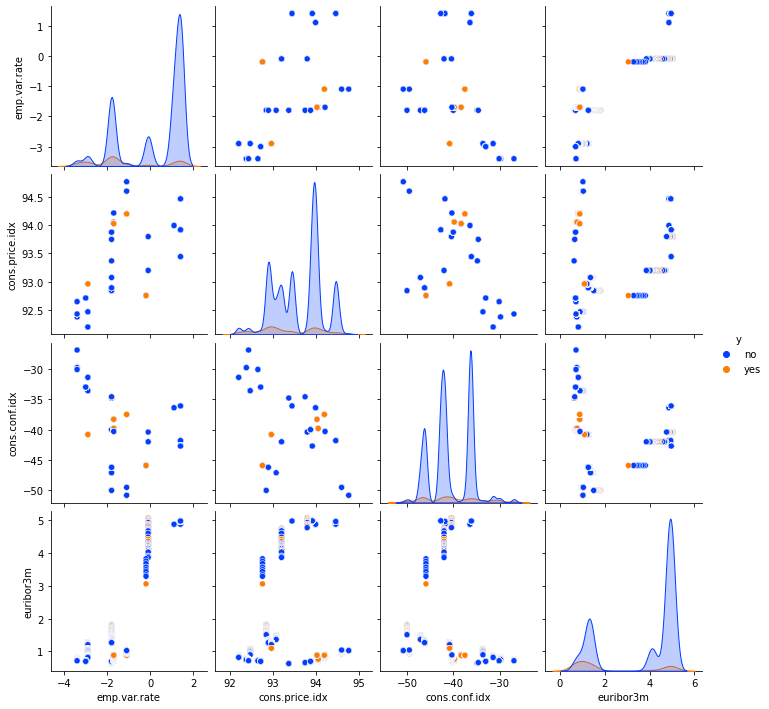

In [16]:
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue='y', palette='bright')

In [17]:
successful_calls = bank_data['y'] =='yes'
plot_data = bank_data[campain_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_9636\2304812266.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


In [18]:
plot_data = bank_data[campain_columns + financial_columns][~successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_9636\2166071659.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


**Some conclusions:** <br>
- As we can observe from the preceding two figures, the correlation between **euribor3m** and **emp.var.rate** is very high (approximately 0.93 for successful and 0.98 for unsuccessfull calls). A positive correlation between those values means that in an expanding economy which more people are hired than fired, interest rates tend to be higher. 
- A high positive correlation of **cons.price.idx** column with the **emp.var.rate** and **euribor3m columns** is a clear indicators of an expanding economy, in which growing employment means more people with money-hence more spending and higher inflation. In such situations, central banks tend to increase interest rates (in order to keep inflaction under control), which is totally in line with our observation of increasing the **euribor3m** colum 
- Another key things to note that there are high correlations between **duration** and **emp.var.rate**, **duration** and **euribor3m** for successfull campain but reversely happen for unsuccessfull campain. This might look like a significant indicator at first, but note that the macroeconomic factors that is definitely not influenced by the length of certain phone calls, for that reason this correlation does not imply causation
- An interesting fact arises: the consumer confidence index is negatively correlated with **cons.price.idx**, **emp.var.rate** and **euribor3m columns** for successfull customer calls and positively correlated for unsuccessful ones. This means that when the overal economic sentiment is pessimistic, people are willing to accept the new banking products and vice versa

In [19]:
bank_data['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

#### Feature Selection

In [20]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [40]:
# Apply chi_test to decide if two variables might be related or not
from scipy.stats import chi2_contingency

def chi_test(df, col):
    crosstab = pd.crosstab(df[col], df['y'])
    chi_test = chi2_contingency(crosstab)
    return ( col, chi_test[1]-0.05)
dataframe = pd.DataFrame(columns=['Column', 'Result'])
for index, col in enumerate(categorical_features):
    dataframe.loc[index] = chi_test(bank_data, col)
    
dataframe

,Column,Result
0,job,-0.050000
1,marital,-0.050000
2,education,-0.050000
3,default,-0.050000
4,housing,0.008294
5,loan,0.528675
6,contact,-0.050000
7,month,-0.050000
8,day_of_week,-0.049970
9,poutcome,-0.050000


Observation: <br>
- From the shown table, we can derive that **housing** and **loan** do not have statistical correlation with the result of campain, while the reverse could be seen in the rest of features including **job**, **marital**, **education**, **default**, **contact**, **month**, **day_of_week**, **poutcome**